<a href="https://colab.research.google.com/github/Alcyonee/Black-body-funtion-graph/blob/main/Model_Bintang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Section

Dengan menggunakan STATSTAR, buatlah model struktur interior ZAMS bintang bermassa 1,0 , dengan input sebagai berikut:

Massa bintang           = 1,0

Luminositas bintang = 0,86071

Temperatur efektif   = 5500,2 K

Fraksi massa X           = 0,700

Fraksi massa Y           = 0,292

Fraksi massa Z           = 0,008

Hasil perhitungan STATSTAR tersimpan dalam file ‘starmodl.dat’.

In [ ]:
# Mengimpor modul-modul yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("modelbintang.xlsx") # Membaca data excel modelbintang.xlsx (STATSTAR)
data = df[::-1]    # Membalikkan ukuran data
data = data.reset_index(drop=True)  # Reset nilai indeks
data

,r,Qm,L_r,T,P,rho,kap,eps,zones,dlP dlT
0,7.110000e+10,0.000000e+00,3.290000e+33,0.0,0.000000e+00,0.000000e+00,0.00,0.00E+00,r,4.2
1,7.100000e+10,3.940000e-14,3.290000e+33,3290.0,7.970000e+00,1.750000e-11,230.00,1.67-102,r,4.2
2,7.090000e+10,6.080000e-13,3.290000e+33,6580.0,2.260000e+02,2.520000e-10,172.00,3.79E-81,r,4.8
3,7.080000e+10,3.400000e-12,3.290000e+33,9880.0,1.660000e+03,1.240000e-09,148.00,1.20E-70,r,4.9
4,7.080000e+10,1.180000e-11,3.290000e+33,13200.0,6.640000e+03,3.720000e-09,130.00,5.65E-64,r,4.8
...,...,...,...,...,...,...,...,...,...,...
419,4.190000e+09,9.880000e-01,5.510000e+32,13500000.0,1.320000e+17,7.310000e+01,1.49,1.21E+01,c,2.5
420,3.480000e+09,9.930000e-01,4.280000e+32,13700000.0,1.360000e+17,7.450000e+01,1.46,1.31E+01,c,2.5
421,2.770000e+09,9.970000e-01,3.400000e+32,13800000.0,1.400000e+17,7.570000e+01,1.44,1.39E+01,c,2.5
422,2.060000e+09,9.990000e-01,2.830000e+32,13900000.0,1.430000e+17,7.660000e+01,1.42,1.46E+01,c,2.5


In [ ]:
# Inisialisasi array dari data STATSTAR
r = data['r'].to_numpy()
Qm = data['Qm'].to_numpy()
L_r = data['L_r'].to_numpy()
T = data['T'].to_numpy()
P = data['P'].to_numpy()
rho = data['rho'].to_numpy()
kap = data['kap'].to_numpy()
eps = data['eps'].to_numpy()
# Inisialisasi parameter fisis di pusat & permukaan bintang dari STATSTAR
T_core =1.41421E+07   # K
P_core = 1.46284E+17  # dynes/cm^2
R_surface = 1.020998 * 6.96e10  # cm
Qm_surface = Qm[0]
L_r_surface = L_r[0]

In [ ]:
# Inisialisasi array untuk parameter kedalaman optis
tau = np.zeros(len(r))

# Pengulangan untuk data ke-i dalam rentang jumlah data radius bintang dikurangi 1
for i in range(len(r)-1):
  # Jika i sama dengan 0 (indeks pertama), nilai kedalaman optis nya (di permukaan) adalah 0
  if i == 0:
    tau[i] = 0
    tau[i+1] = tau[i] - ((((kap[i]*rho[i])+(kap[i+1]*rho[i+1]))/2) * (r[i+1]-r[i]))
  # Untuk selain i sama dengan 0, nilai kedalaman optis[i] nya adalah nilai dari kedalaman optis pada i sebelumnya
  else:
    tau[i+1] = tau[i] - ((((kap[i]*rho[i])+(kap[i+1]*rho[i+1]))/2) * (r[i+1]-r[i]))
  i += 1

# Masukkan data hasil perhitungan kedalaman optis ke dalam tabel
data["tau"] = np.array(tau)
data.to_excel("modelbintang.xlsx", index=False)

In [ ]:
# Inisialisasi array untuk parameter temperatur
T_perhitungan = np.zeros(len(r))
# Inisialisasi temperatur efektif
T_eff = 5500.2

# Pengulangan untuk data ke-i dalam rentang jumlah data radius bintang
for i in range(len(r)):
  T_perhitungan[i] = (3/4*(T_eff**4)*(tau[i]+2/3))**(1/4)
  i += 1

# Masukkan data hasil perhitungan kedalaman optis ke dalam tabel
data["T_perhitungan"] = np.array(T_perhitungan)
data.to_excel("modelbintang.xlsx", index=False)
data

,r,Qm,L_r,T,P,rho,kap,eps,zones,dlP dlT,tau,T_perhitungan
0,7.110000e+10,0.000000e+00,3.290000e+33,0.0,0.000000e+00,0.000000e+00,0.00,0.00E+00,r,4.2,0.000000e+00,4.625098e+03
1,7.100000e+10,3.940000e-14,3.290000e+33,3290.0,7.970000e+00,1.750000e-11,230.00,1.67-102,r,4.2,2.012500e-01,4.940414e+03
2,7.090000e+10,6.080000e-13,3.290000e+33,6580.0,2.260000e+02,2.520000e-10,172.00,3.79E-81,r,4.8,2.569700e+00,6.865280e+03
3,7.080000e+10,3.400000e-12,3.290000e+33,9880.0,1.660000e+03,1.240000e-09,148.00,1.20E-70,r,4.9,1.391290e+01,1.000184e+04
4,7.080000e+10,1.180000e-11,3.290000e+33,13200.0,6.640000e+03,3.720000e-09,130.00,5.65E-64,r,4.8,1.391290e+01,1.000184e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
419,4.190000e+09,9.880000e-01,5.510000e+32,13500000.0,1.320000e+17,7.310000e+01,1.49,1.21E+01,c,2.5,1.942157e+12,6.042476e+06
420,3.480000e+09,9.930000e-01,4.280000e+32,13700000.0,1.360000e+17,7.450000e+01,1.46,1.31E+01,c,2.5,2.019437e+12,6.101707e+06
421,2.770000e+09,9.970000e-01,3.400000e+32,13800000.0,1.400000e+17,7.570000e+01,1.44,1.39E+01,c,2.5,2.096748e+12,6.159286e+06
422,2.060000e+09,9.990000e-01,2.830000e+32,13900000.0,1.430000e+17,7.660000e+01,1.42,1.46E+01,c,2.5,2.174060e+12,6.215294e+06


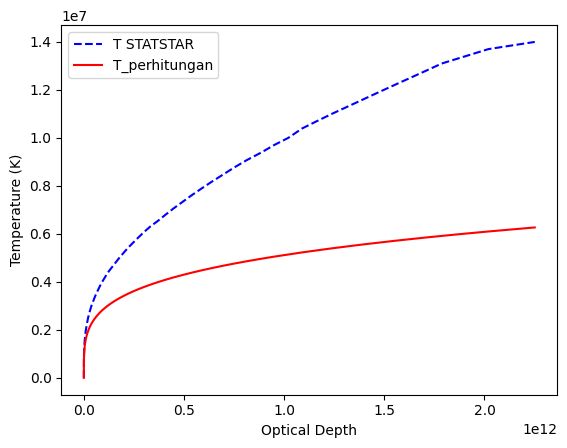

In [ ]:
# Membuat plot temperatur dari STATSTAR
plt.plot(tau, T, linestyle='--', label='T STATSTAR', color='blue')

# Membuat plot temperatur dari perhitungan
plt.plot(tau, T_perhitungan, label='T_perhitungan', color='red')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Optical Depth')
plt.ylabel('Temperature (K)')

# Menambahkan legenda (penanda) untuk plot
plt.legend()

# Menampilkan grafik
plt.show()

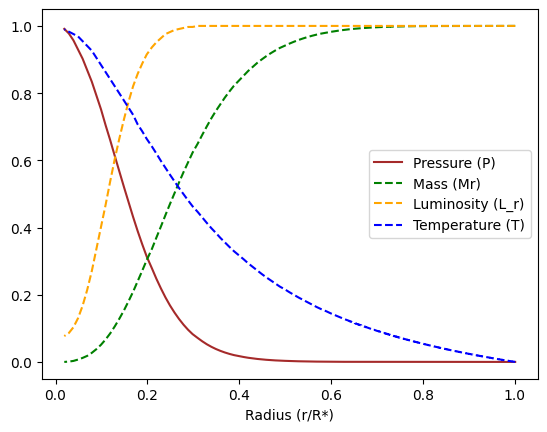

In [ ]:
# Membuat plot tekanan terhadap radius
plt.plot(r/R_surface, P/P_core, label='Pressure (P)', color='brown')

# Membuat plot massa terhadap radius
plt.plot(r/R_surface, 1-Qm, linestyle='--', label='Mass (Mr)', color='green')

# Membuat plot luminositas terhadap radius
plt.plot(r/R_surface, L_r/L_r_surface, linestyle='--', label='Luminosity (L_r)', color='orange')

# Membuat plot temperatur terhadap radius
plt.plot(r/R_surface, T/T_core, linestyle='--', label='Temperature (T)', color='blue')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Radius (r/R*)')
plt.ylabel('')

# Menambahkan legenda (penanda) untuk plot
plt.legend()

# Menampilkan grafik
plt.show()

# Second Section

In [ ]:
# Membaca data excel modelbintang2.xlsx (model struktur interior ZAMS bintang dengan fraksi massa X = 0,700, Y = 0,292, dan Z = 0,008)
data2 = pd.read_excel("modelbintang2.xlsx")
data2

,M,T_eff,L,T_c,rho_c
0,0.75,3788.5,0.189,11700000.0,69.30
1,1.00,5402.0,0.859,14600000.0,76.70
2,1.50,8644.6,6.408,19800000.0,83.10
3,3.00,14671.0,113.500,23400000.0,35.60
4,5.00,20069.0,745.700,27800000.0,19.70
5,8.00,25366.5,3409.000,30600000.0,10.30
6,10.00,27933.0,6607.000,31800000.0,7.52


In [ ]:
# Inisialisasi array dari data model
M = data2['M'].to_numpy()
T_eff = data2['T_eff'].to_numpy()
L = data2['L'].to_numpy()
T_c = data2['T_c'].to_numpy()
rho_c = data2['rho_c'].to_numpy()

In [ ]:
# Inisialisasi array untuk parameter log_epsilon
log_epsilon = np.zeros(len(M))

# Pengulangan untuk data ke-i dalam rentang jumlah data massa bintang
for i in range(len(M)):
  log_epsilon[i] = np.log10((L[i] * 3.86e26)/(M[i] * 1.989e30)) # Satuan untuk log_epsilon, L, dan M berturut-turut adalah W kg^-1, W, dan Kg
  i += 1

# Masukkan data hasil perhitungan log_epsilon ke dalam tabel
data2["log_epsilon"] = np.array(log_epsilon)
data2.to_excel("modelbintang2.xlsx", index=False)
data2

,M,T_eff,L,T_c,rho_c,log_epsilon
0,0.75,3788.5,0.189,11700000.0,69.30,-4.310647
1,1.00,5402.0,0.859,14600000.0,76.70,-3.778054
2,1.50,8644.6,6.408,19800000.0,83.10,-3.081416
3,3.00,14671.0,113.500,23400000.0,35.60,-2.134173
4,5.00,20069.0,745.700,27800000.0,19.70,-1.538453
5,8.00,25366.5,3409.000,30600000.0,10.30,-1.082510
6,10.00,27933.0,6607.000,31800000.0,7.52,-0.892043


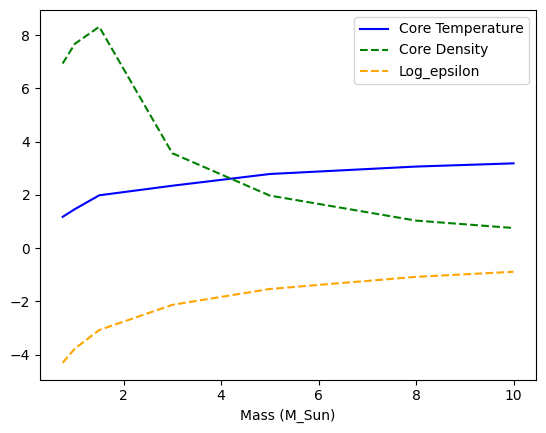

In [ ]:
# Membuat plot temperatur pusat terhadap massa bintang
plt.plot(M, T_c/1e7, label='Core Temperature', color='blue')

# Membuat plot kerapatan pusat terhadap massa bintang
plt.plot(M, (rho_c * 1000)/1e4, linestyle='--', label='Core Density', color='green')

# Membuat plot log_epsilon terhadap massa bintang
plt.plot(M, log_epsilon, linestyle='--', label='Log_epsilon', color='orange')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Mass (M_Sun)')
plt.ylabel('')

# Menambahkan legenda (penanda) untuk plot
plt.legend()

# Menampilkan grafik
plt.show()

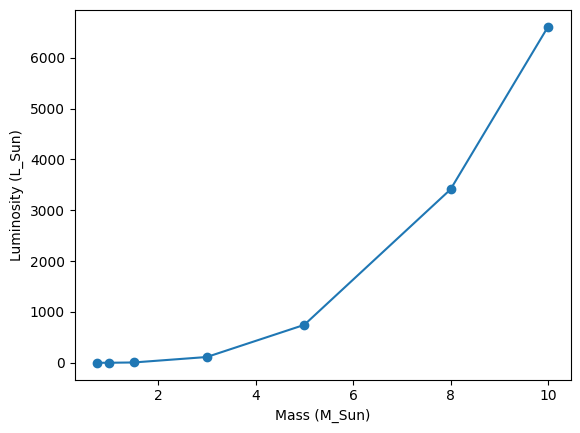

In [ ]:
# Membuat plot luminositas terhadap massa bintang
plt.plot(M, L)
plt.scatter(M, L)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Mass (M_Sun)')
plt.ylabel('Luminosity (L_Sun)')

# Menampilkan grafik
plt.show()

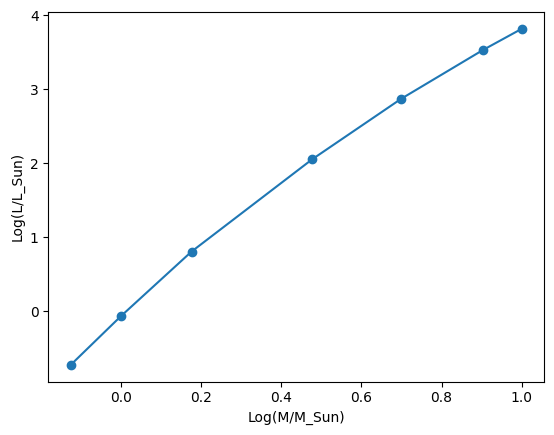

In [ ]:
# Membuat plot log_luminositas terhadap log_massa bintang
plt.plot(np.log10(M), np.log10(L))
plt.scatter(np.log10(M), np.log10(L))

# Menambahkan label pada sumbu x dan y
plt.xlabel('Log(M/M_Sun)')
plt.ylabel('Log(L/L_Sun)')

# Menampilkan grafik
plt.show()

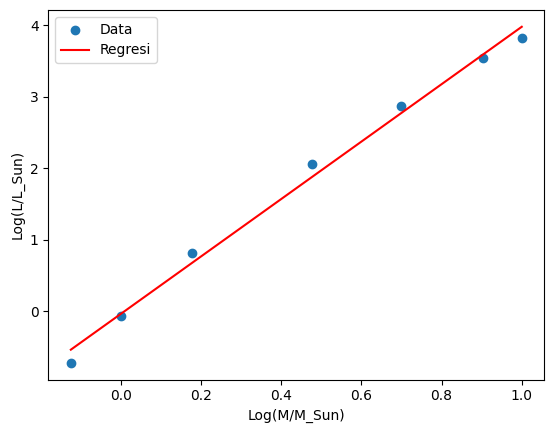

Nilai alpha: 4.014968280546375


In [ ]:
# Import modul tambahan yang diperlukan
from scipy.stats import linregress

plt.scatter(np.log10(M), np.log10(L), label="Data")

# Gunakan metode regresi linier dari scipy
slope, intercept, r_value, p_value, std_err = linregress(np.log10(M), np.log10(L))

y_regression = slope * np.log10(M) + intercept

plt.plot(np.log10(M), y_regression, label='Regresi', color='red')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Log(M/M_Sun)')
plt.ylabel('Log(L/L_Sun)')

# Menambahkan legenda (penanda) untuk plot
plt.legend()

# Menampilkan grafik
plt.show()

# Menampilkan hasil regresi
alpha = slope
print("Nilai alpha:", alpha)


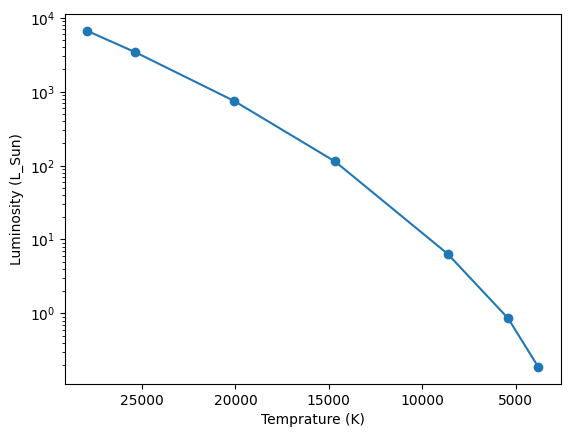

In [ ]:
# Membuat plot diagram HR (luminositas terhadap temperatur)
plt.scatter(T_eff, L)
plt.plot(T_eff, L)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Temprature (K)')
plt.ylabel('Luminosity (L_Sun)')

# Mengubah skala pada sumbu y (luminositas)
plt.yscale('log')

# Megubah urutan sumbu x dari temperatur terbesar ke temperatur terkecil
plt.gca().invert_xaxis()

# Menampilkan grafik
plt.show()

In [ ]:
# Membaca data excel modelbintang.xlsx (model struktur interior ZAMS bintang dengan fraksi massa X = 0,700, Y=0,290 dan Z = 0,010)
data3 = pd.read_excel("modelbintang3.xlsx")
data3

,M,T_eff,L
0,0.75,3583.5,0.161
1,1.00,5196.3,0.760
2,1.50,8219.0,5.620
3,3.00,14146.5,104.700
4,5.00,19556.8,710.000
5,8.00,24819.5,3317.000
6,10.00,27439.0,6475.000


In [ ]:
# Inisialisasi array dari data model
T_eff2 = data3['T_eff'].to_numpy()
L2 = data3['L'].to_numpy()

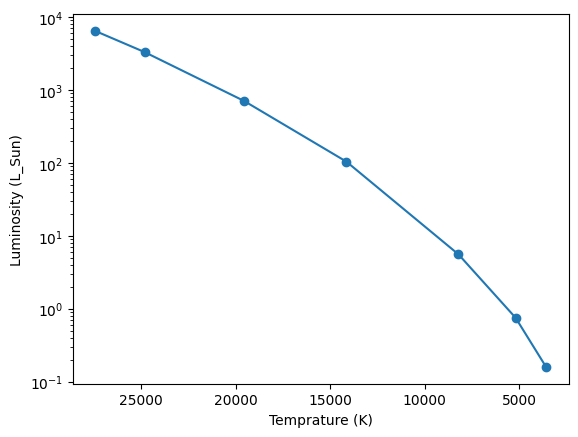

In [ ]:
# Membuat plot diagram HR (luminositas terhadap temperatur)
plt.scatter(T_eff2, L2)
plt.plot(T_eff2, L2)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Temprature (K)')
plt.ylabel('Luminosity (L_Sun)')

# Mengubah skala pada sumbu y (luminositas)
plt.yscale('log')

# Megubah urutan sumbu x dari temperatur terbesar ke temperatur terkecil
plt.gca().invert_xaxis()

# Menampilkan grafik
plt.show()

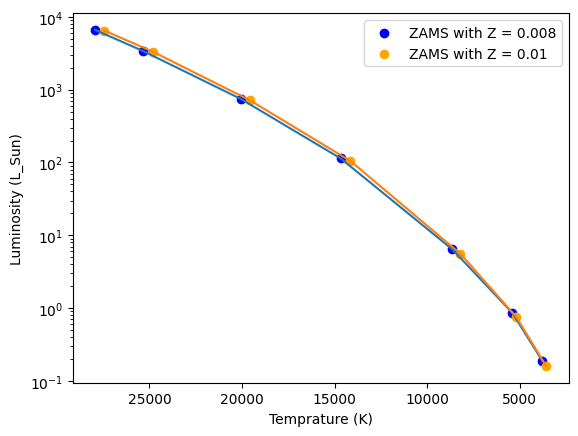

In [ ]:
# Membuat plot diagram HR (luminositas terhadap temperatur) untuk 2 model ZAMS
plt.scatter(T_eff, L, label='ZAMS with Z = 0.008', color='blue')
plt.plot(T_eff, L)
plt.scatter(T_eff2, L2, label='ZAMS with Z = 0.01', color='orange')
plt.plot(T_eff2, L2)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Temprature (K)')
plt.ylabel('Luminosity (L_Sun)')

# Mengubah skala pada sumbu y (luminositas)
plt.yscale('log')

# Megubah urutan sumbu x dari temperatur terbesar ke temperatur terkecil
plt.gca().invert_xaxis()

# Menambahkan legenda (penanda) untuk plot
plt.legend()

# Menampilkan grafik
plt.show()